#### Definition
1. mm, s, radian, keV unless specified otherwise in the plot 
3. The coordinate convention of this simulation and its relation to XPP coordinate is 
    (axis 0, axis 1, axis 2) = (vertical, horizontal, propagation) = (xpp y, xpp x, xpp z) 

np.fft(field) = spectrum

np.ifft(spectrum) = field

# Important !!!

In [1]:
# Whether use gpu-based wave-optics simulation or not.
# With gpu=False, only ray-tracing calculation is performed. 
gpu = False

In [2]:
import sys

sys.path.append("../../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt
from XRaySimulation import util, DeviceSimu, Pulse

# Level 1: simulate the XPP and the X-ray
import Controller

if gpu:
    import gpuWaveOptics

# Level 2: Develop the auto-alignment algorithm which control either the simulator or XPP controller through the parser.
import parser

plt.rcParams.update({'font.size': 12})

## 1. Start the simulation

In [3]:
# Create a controller object as we have at XPP
x = Controller.XppController_TG()

sase_source = Pulse.saseSource(nx=32, ny=32, nz=1024,
                               dx=4, dy=4, dz=0.1, Ec=9.8,
                               mean_pulse_energy_uJ=600,  # uJ.  10 uJ / 0.5eV * 30 eV = 600 uJ
                               pulse_energy_sigma_uJ=100,
                               # SASE energy fluctuation. Not the fluctuation after the xpp mono
                               n_gaussian=500,
                               mode_size_x=15,
                               mode_size_y=15,
                               mode_size_z=0.15 * util.c,
                               mode_center_spread_x=20,
                               mode_center_spread_y=20,
                               mode_center_spread_z=20 * util.c,
                               x0=np.array([0, -50e3, -30e6]))

Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, rotating around y axis.
Create a SA07A motor, rotating around z axis.
Create a XA10A motor, moving along x axis.
Create a XA10A motor, moving along y axis.
Create a RA10A motor, ro

### Define functions on the fly

In [4]:
def move_vcc_zero():
    _ = x.t2.x_umv(0)
    _ = x.t3.x_umv(0)
    
def move_vcc(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(-val)

def move_delay0(val):
    _ = x.t2.x_umvr(val)
    _ = x.t3.x_umvr(val)

def move_delay(val):
    _ = x.t45.delay_umvr(val)

def move_sample():
    print("Move sample tower to sample")
    print("Move sample.z")
    _ = x.sample.z_umv(11565.5671)
    print("Move sample.x")
    _ = x.sample.x_umv(22804.9636)

def move_yag():
    print("Move sample tower to yag")
    print("Move sample.z")
    _ = x.sample.z_umv(0)
    print("Move sample.x")
    _ = x.sample.x_umv(0)

def move_sample_yag():
    pass

def optimize_miniSD_alignment(gpu_flag=gpu):
    pass

def optimize_CC_VCC_overlap(gpu_flag=gpu):
    pass

### Development the auto-alignment algorithm in this cell

In [5]:
pass

### Preparation: Align the mono

Motor moved from 0.00000 to -17.88927 degree
Motor moved from 0.00000 to -17.88927 degree
Motor moved from -17.88927 to -17.89077 degree
Motor moved from -17.88927 to -17.89077 degree


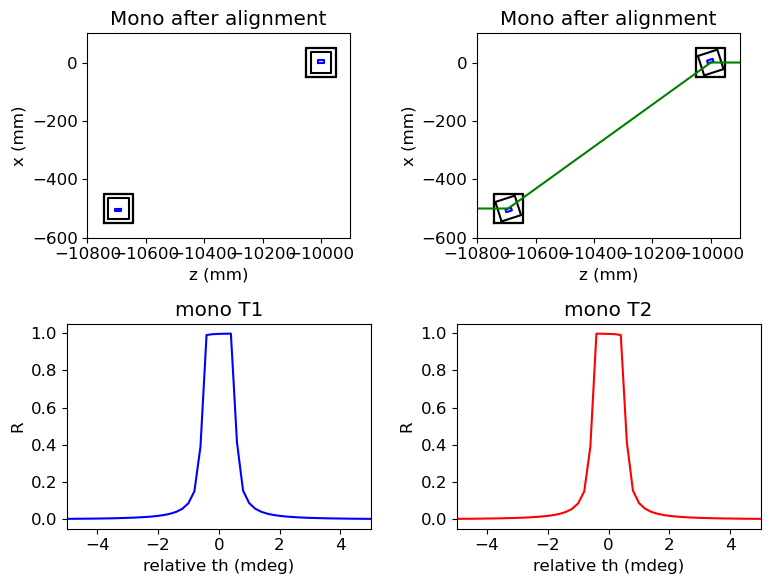

In [6]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(6)
fig.set_figwidth(8)

# show mono before alignment
x.plot_mono_optics(ax=ax[0, 0])

# show mono after alignment
_ = x.align_xpp_mono()
x.plot_mono_optics(ax=ax[0, 1], show_trajectory=True)
x.plot_mono_rocking(ax_mono_t1=ax[1, 0], ax_mono_t2=ax[1, 1])

plt.tight_layout()
plt.show()

### Preparation: Align the miniSD

Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 0.00000 to 19.23525 degree
Motor moved from 19.23525 to 19.23603 degree
Motor moved from 19.23525 to 19.23614 degree
Motor moved from 19.23525 to 19.23595 degree
Motor moved from 19.23525 to 19.23693 degree
Motor moved from 19.23525 to 19.23705 degree
Motor moved from 19.23525 to 19.23593 degree


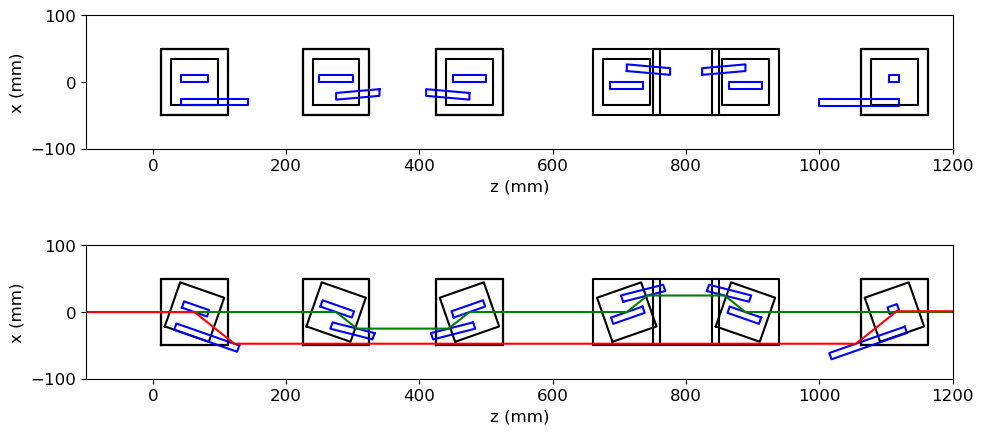

In [7]:
# Prepare a canvas. This section is not important. 
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

#     Before alignment
x.plot_miniSD_table(ax=ax[0], xlim=None, ylim=None, show_trajectory=False)

#     After alignment
_ = x.align_miniSD()
x.plot_miniSD_table(ax=ax[1], xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Get the most updated rocking curve around current location.


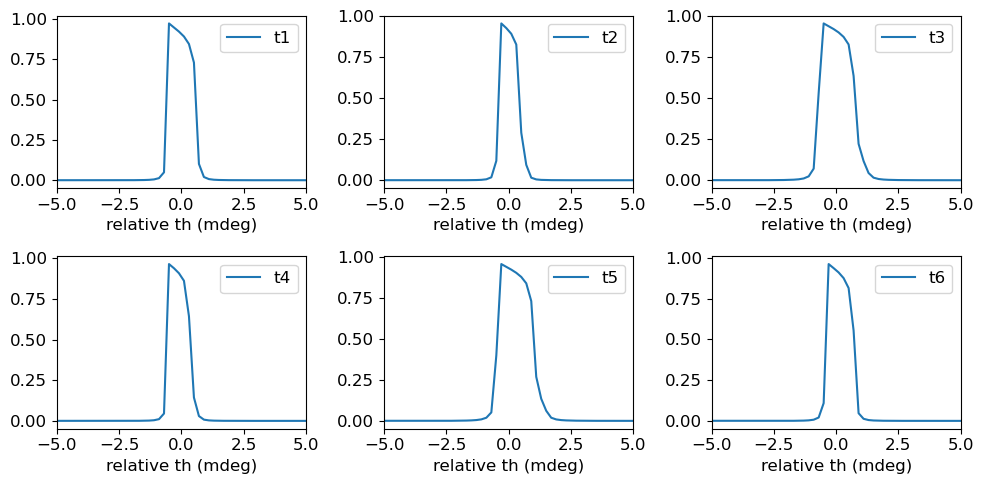

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(5)
fig.set_figwidth(10)

x.plot_miniSD_rocking(ax_list=np.reshape(ax, 6))

plt.tight_layout()
plt.show()

# Step 1: Find the X-ray pulse after miniSD on the downstream YAG after the miniSD

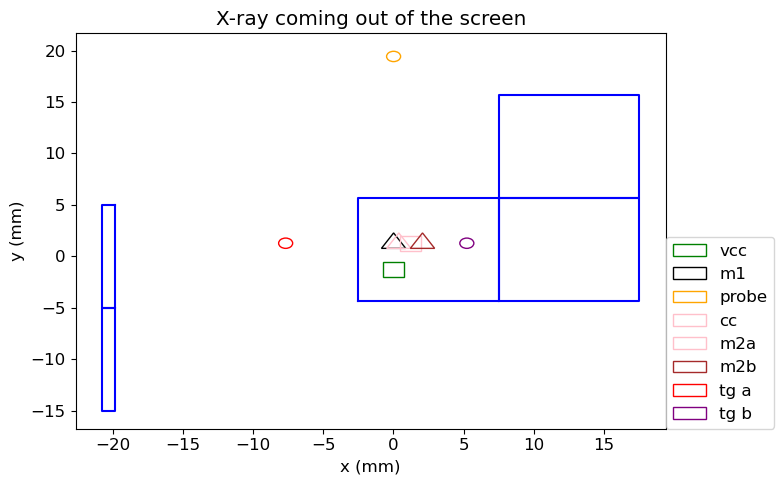

In [9]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(5)
fig.set_figwidth(8)

x.plot_beam_on_yag(ax=ax)

plt.tight_layout()
plt.show()

# Step 2: Align the probe beam such that it overlap with the CC beam
## Step 2a: Find the beam after the mirror 1 on the YAG


In [10]:
# Assume that we have calibrated the incident angle
_ = x.m1.pi_umv(np.deg2rad(0.1))

# Move the mirror position such that the interaction point with the mirror is at location z=4e6
path_ref = x.get_raytracing_trajectory(path="probe m1 only")
_ = x.m1.y_umvr(100)
path_new = x.get_raytracing_trajectory(path="probe m1 only")

coef = path_new[0][-2][2] - path_ref[0][-2][2]
total_diff = x.m1.optics.surface_point[2] - path_new[0][-2][2]
print("Move the TG-a pulse {:.5f} um in y axis by moving m1y 100 um".format(coef))
print("Need to move m1y {:.5f} um to compensate the total difference of {:.5f} um".format(
    total_diff / coef * 100, total_diff))
_ = x.m1.y_umvr(total_diff / coef * 100)

Motor moved from 0.00000 to 0.10000 degree
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse -53361.48046 um in y axis by moving m1y 100 um
Need to move m1y -851.01716 um to compensate the total difference of 454115.35633 um
Motor moved from 100.0000 um to to -751.0172 um


Perform ray tracing calculation at current motor position.


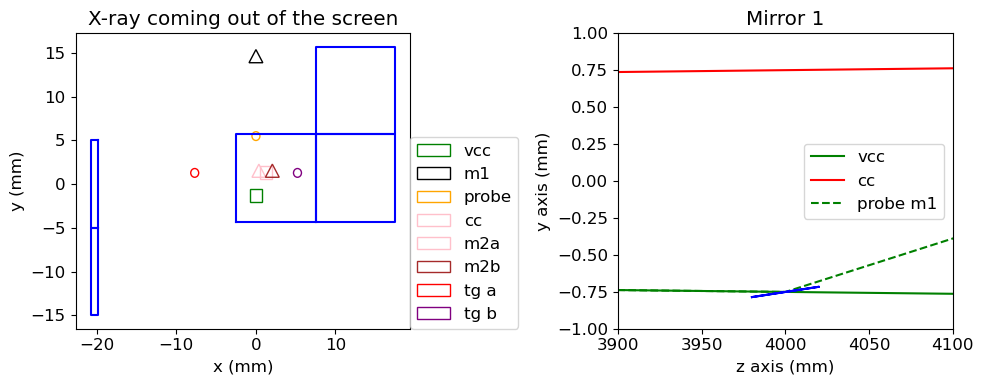

In [11]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_m1_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

## Step 2b Align the silicon 111 crystal

### Align Bragg angle

In [12]:
# During operation, we need to make sure first that the X-ray is hiting on the si 111 crsytal
# Get the theoretical Bragg angle
bragg_si111 = util.get_bragg_angle(wave_length=np.pi * 2 / x.gaussian_pulse.klen0, plane_distance=Controller.si111['d'])

# Account for the 10 deg of the adaptor tilting
ang_diff = bragg_si111 - np.deg2rad(10)

# Rotate the crystal by the remaining angle
_ = x.si.pi_umv(ang_diff)

# Get the rocking curve from this crystal
(angles1, reflect_sigma1,
 reflect_pi1, b_factor1, kout1) = DeviceSimu.get_rocking_curve_around_axis(
    kin=x.gaussian_pulse.k0,
    scan_range=np.deg2rad(0.5),
    scan_number=10 ** 4,
    rotation_axis=x.si.pi.rotation_axis,
    h_initial=x.si.optics.h,
    normal_initial=x.si.optics.normal,
    thickness=x.si.optics.thickness,
    chi_dict=x.si.optics.chi_dict, )

# Get the target bragg peak
fwhm, angle_adjust, index = util.get_fwhm(coordinate=angles1,
                                          curve_values=np.square(np.abs(reflect_pi1)),
                                          center=True,
                                          get_index=True)

# Move the crystal to the target path
_ = x.si.pi_umv(target=x.si.pi.control_location + angle_adjust)

Motor moved from 0.00000 to 1.63904 degree
Motor moved from 1.63904 to 1.63922 degree


### Align silicon position and overlap

In [13]:
# Align the vertical overlap with the reference pump pulse
probe_old_traj, kout, probe_old_path = x.get_raytracing_trajectory(path="probe")
_ = x.si.y_umvr(100)
probe_new_traj, kout, probe_new_path = x.get_raytracing_trajectory(path="probe")
pump_ref_traj, kout, pump_ref_path = x.get_raytracing_trajectory(path="cc")

coef = probe_new_traj[-1][0] - probe_old_traj[-1][0]
total_diff = pump_ref_traj[-1][0] - probe_new_traj[-1][0]

print("Move the probe pulse {:.5f} um in y axis by moving siy 100 um".format(coef))
print("Need to move siy {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                          total_diff))
_ = x.si.y_umvr(total_diff / coef * 100)

Motor moved from 0.0000 um to to 100.0000 um
Move the probe pulse 209.04242 um in y axis by moving siy 100 um
Need to move siy -1311.74421 um to compensate the total difference of -2742.10187 um
Motor moved from 100.0000 um to to -1211.7442 um


Perform ray tracing calculation at current motor position.


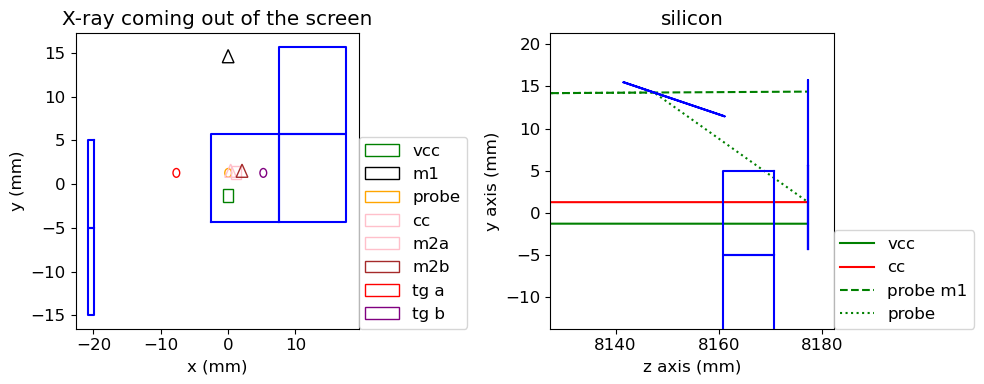

In [14]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_figheight(4)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0])
x.plot_si_traj(ax=ax[1], axis='yz')

plt.tight_layout()
plt.show()

### Align the horizontal position of the probe beam with the CC beam

In [15]:
move_yag()

# get current position of the beams on the yag
beam_pos_1 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_1['probe'] - beam_pos_1['cc'])

# Walk the motors a little bit
move_vcc(100)

# get current position of the beams on the yag
beam_pos_2 = x.get_beam_position_on_yag()
print("The different between probe beam and cc on the yag is")
print(beam_pos_2['probe'] - beam_pos_2['cc'])

# get the dependence on the beam position and the motion of vcc motors
change = beam_pos_2['probe'] - beam_pos_1['probe']
print("The relative beam positions between the probe and cc beam changes")
print(change)
print("by changing the t2x and t3x by 100 um")

delta = (beam_pos_2['cc'] - beam_pos_2['probe'])[1] / change[1] * 100

print("The current total difference is", beam_pos_2['cc'] - beam_pos_2['probe'])
print("Needs to move {}um to elimiate the horizontal difference".format(delta))

move_vcc(delta)

beam_pos_3 = x.get_beam_position_on_yag()
print("After adjusting, the different between probe beam and cc on the yag is")
print(beam_pos_3['cc'] - beam_pos_3['probe'])

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
The different between probe beam and cc on the yag is
[ 1.32997869e-01 -1.21526726e+03  0.00000000e+00]
Motor moved from 0.0000 um to to 100.0000 um
Motor moved from 0.0000 um to to -100.0000 um
The different between probe beam and cc on the yag is
[ 1.35589382e-01 -1.08143111e+03  0.00000000e+00]
The relative beam positions between the probe and cc beam changes
[2.59151362e-03 1.33836151e+02 0.00000000e+00]
by changing the t2x and t3x by 100 um
The current total difference is [-1.35589382e-01  1.08143111e+03  0.00000000e+00]
Needs to move 808.0261593401765um to elimiate the horizontal difference
Motor moved from 100.0000 um to to 908.0262 um
Motor moved from -100.0000 um to to -908.0262 um
After adjusting, the different between probe beam and cc on the yag is
[-0.15646988 -0.44588343  0.        ]


# Step 3: Align the total reflection mirrors for the pump pulse for 5nm

In [16]:
move_yag()

_ = x.m2a.yaw_umv(np.deg2rad(0.2))
_ = x.m2b.yaw_umv(np.deg2rad(0.2))

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
Motor moved from 0.00000 to 0.20000 degree
Motor moved from 0.00000 to 0.20000 degree
The TG period along each dimension in nm: 8.898123498403363


In [17]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 200.29400 um in x axis by moving m2a_x 100 um
Need to move m2a_x 3877.65419 um to compensate the total difference of 7766.70860 um
Motor moved from 100.0000 um to to 3977.6542 um

 
Get trajectory b
Motor moved from 0.0000 um to to 100.0000 um
Move the TG-a pulse 200.05391 um in x axis by moving m2a_x 100 um
Need to move m2a_x -1633.24614 um to compensate the total difference of -3267.37278 um
Motor moved from 100.0000 um to to -1533.2461 um


Move sample tower to yag
Move sample.z
Motor moved from 0.0000 um to to 0.0000 um
Move sample.x
Motor moved from 0.0000 um to to 0.0000 um
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


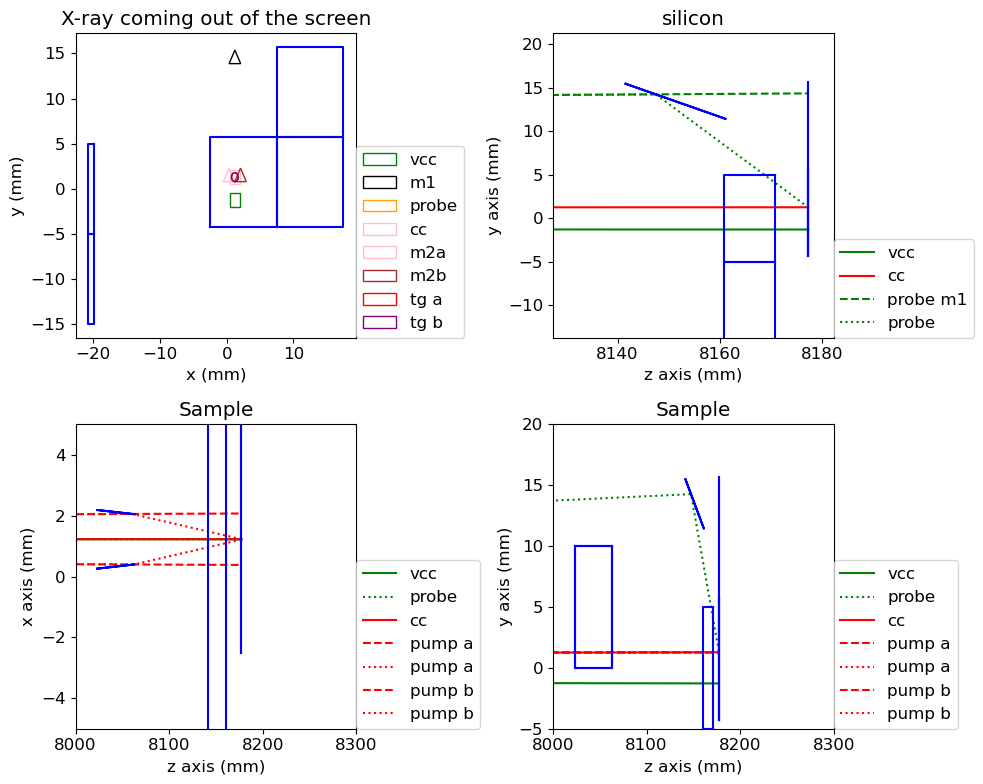

In [18]:
move_yag()

# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[8000, 8300],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[8000, 8300])

plt.tight_layout()
plt.show()

### Align the miniSD location for time 0

Motor moved from 0.0000 um to to -6000.0000 um
Motor moved from 908.0262 um to to 3925.6042 um
Motor moved from -908.0262 um to to 2094.3958 um
-0.08730224955514576
-181.12534956029995


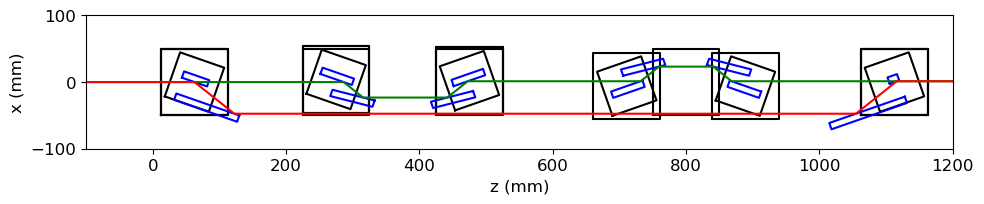

In [19]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
-0.08730224955514576
-11381.583693693023


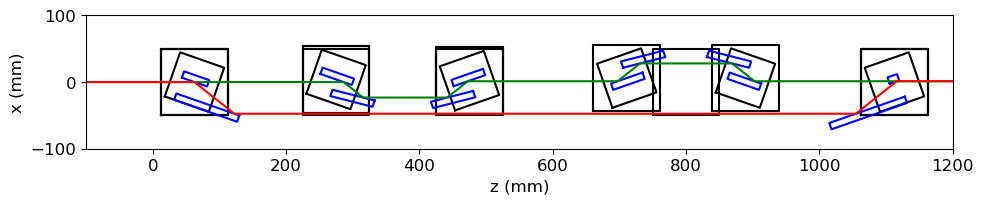

In [20]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 3: Align the total reflection mirrors for the pump pulse for 7nm

In [21]:
_ = x.m2a.yaw_umv(np.deg2rad(0.25))
_ = x.m2b.yaw_umv(np.deg2rad(0.25))
x.m2a.z_umv(49e3)
x.m2b.z_umv(49e3)

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Motor moved from 0.20000 to 0.25000 degree
Motor moved from 0.20000 to 0.25000 degree
Motor moved from 0.0000 um to to 49000.0000 um
Motor moved from 0.0000 um to to 49000.0000 um
The TG period along each dimension in nm: 7.1410393324151675


In [22]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 3977.6542 um to to 4077.6542 um
Move the TG-a pulse 199.88364 um in x axis by moving m2a_x 100 um
Need to move m2a_x 2.62931 um to compensate the total difference of 5.25556 um
Motor moved from 4077.6542 um to to 4080.2835 um

 
Get trajectory b
Motor moved from -1533.2461 um to to -1433.2461 um
Move the TG-a pulse 199.73134 um in x axis by moving m2a_x 100 um
Need to move m2a_x -196.18374 um to compensate the total difference of -391.84042 um
Motor moved from -1433.2461 um to to -1629.4299 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


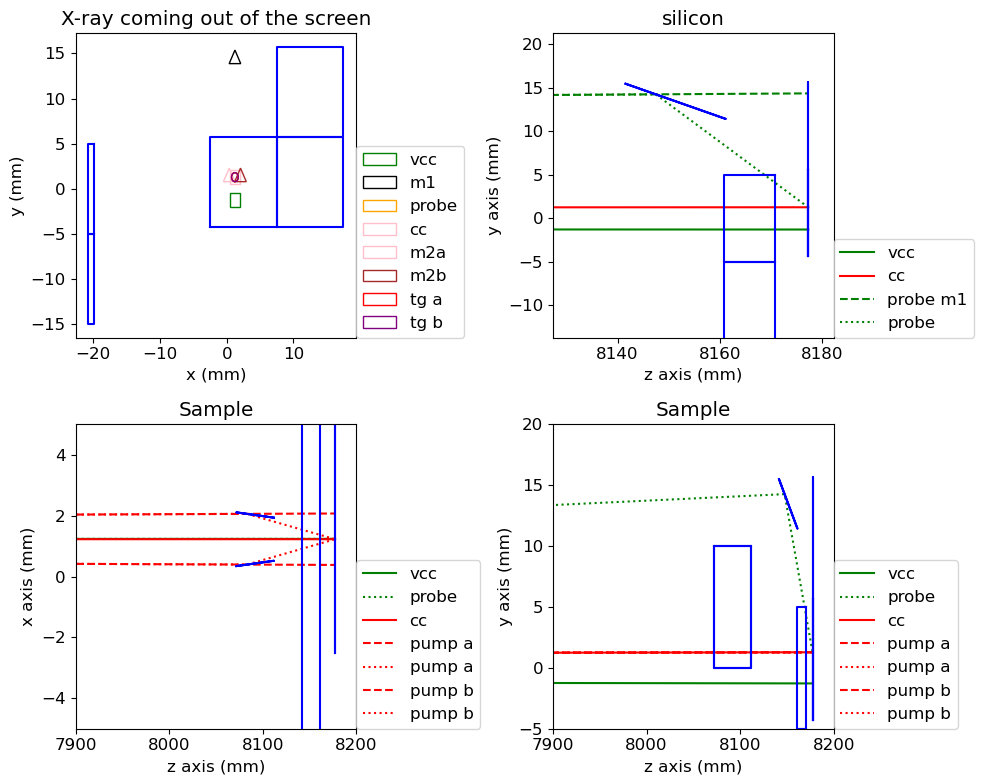

In [23]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[7900, 8200],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[7900, 8200])

plt.tight_layout()
plt.show()

Motor moved from 6000.0000 um to to -6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.010233970373686539
-178.67271781710159


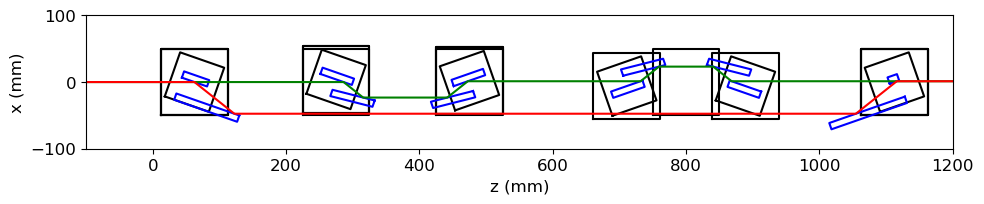

In [24]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
0.010233970373686539
-11379.44080464232


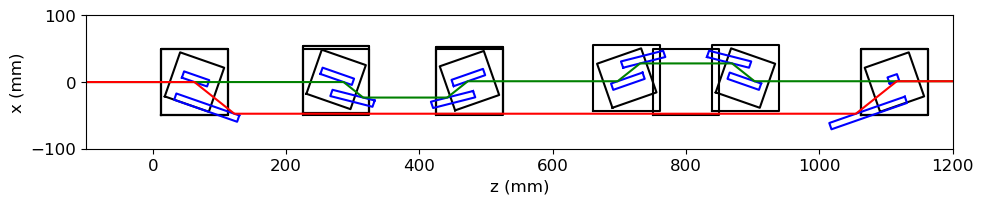

In [25]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

# Step 3: Align the total reflection mirrors for the pump pulse for 15nm

In [26]:
x.m2a.z.control_limits

array([-50000.,  50000.])

In [27]:
_ = x.m2a.yaw_umv(np.deg2rad(0.35))
_ = x.m2b.yaw_umv(np.deg2rad(0.35))
x.m2a.z_umv(-49e3)
x.m2b.z_umv(-49e3)

kout_dict = x.get_sample_kout()
tg_period = np.pi * 2 / (kout_dict['pump a'][-1] - kout_dict['pump b'][-1])[1]
print("The TG period along each dimension in nm:", tg_period * 1e3)

Motor moved from 0.25000 to 0.35000 degree
Motor moved from 0.25000 to 0.35000 degree
Motor moved from 49000.0000 um to to -49000.0000 um
Motor moved from 49000.0000 um to to -49000.0000 um
The TG period along each dimension in nm: 5.119257251294804


In [28]:
# Get the reference trajectory again
pump_ref, kout, pump_ref_path = x.get_raytracing_trajectory(path='cc')

print("Get trajectory a")
pump_a_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
_ = x.m2a.x_umvr(100)
pump_a_traj_new, kout, pump_a_path = x.get_raytracing_trajectory(path='pump a')
# Get the ratio
coef = pump_a_traj_new[-1][1] - pump_a_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_a_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2a.x_umvr(total_diff / coef * 100)

print("\n ")

print("Get trajectory b")
pump_b_traj, kout, pump_a_path = x.get_raytracing_trajectory(path='pump b')
_ = x.m2b.x_umvr(100)
pump_b_traj_new, kout, pump_b_path = x.get_raytracing_trajectory(path='pump b')
# Get the ratio
coef = pump_b_traj_new[-1][1] - pump_b_traj[-1][1]
total_diff = pump_ref[-1][1] - pump_b_traj_new[-1][1]
print("Move the TG-a pulse {:.5f} um in x axis by moving m2a_x 100 um".format(coef))
print("Need to move m2a_x {:.5f} um to compensate the total difference of {:.5f} um".format(total_diff / coef * 100,
                                                                                            total_diff))
_ = x.m2b.x_umvr(total_diff / coef * 100)

Get trajectory a
Motor moved from 4080.2835 um to to 4180.2835 um
Move the TG-a pulse 199.69939 um in x axis by moving m2a_x 100 um
Need to move m2a_x -848.99064 um to compensate the total difference of -1695.42916 um
Motor moved from 4180.2835 um to to 3331.2929 um

 
Get trajectory b
Motor moved from -1629.4299 um to to -1529.4299 um
Move the TG-a pulse 199.97817 um in x axis by moving m2a_x 100 um
Need to move m2a_x 649.52767 um to compensate the total difference of 1298.91359 um
Motor moved from -1529.4299 um to to -879.9022 um


Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.
Perform ray tracing calculation at current motor position.


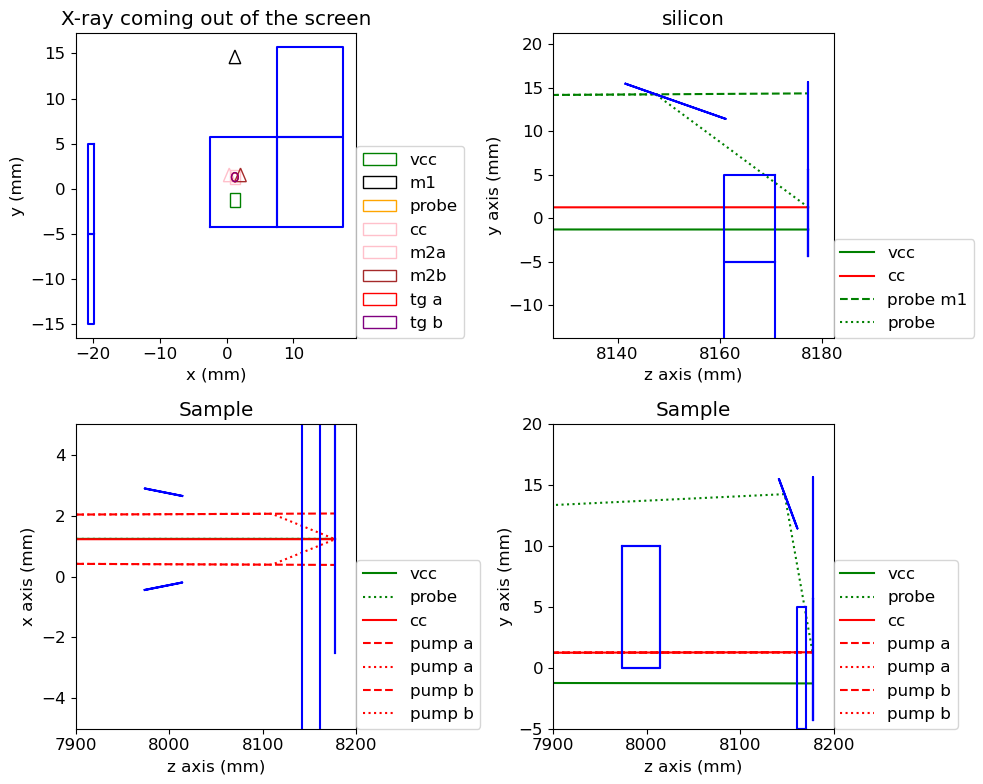

In [29]:
# Show the YAG boundaries and the CC pulse location on the YAG
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.set_figheight(8)
fig.set_figwidth(10)

x.plot_beam_on_yag(ax=ax[0, 0])
x.plot_si_traj(ax=ax[0, 1], axis='yz')
#x.plot_tg_traj(ax=ax[1, 0], ylim=[-30, 20], axis='xz', xlim=[7400, 7800],)
x.plot_tg_traj(ax=ax[1, 0], ylim=[-5, 5], axis='xz', xlim=[7900, 8200],)
x.plot_tg_traj(ax=ax[1, 1], ylim=[-5, 20], axis='yz', xlim=[7900, 8200])

plt.tight_layout()
plt.show()

Motor moved from 6000.0000 um to to -6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
-0.06425917127809055
-175.20500685725446


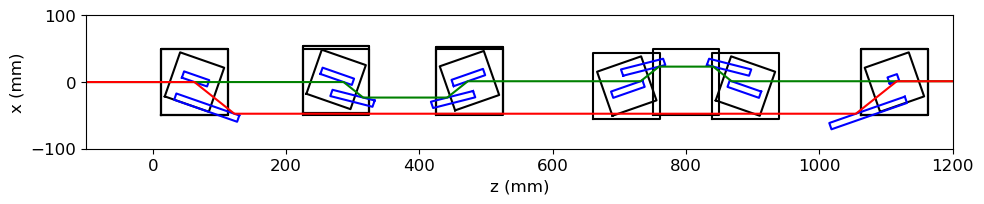

In [30]:
# Search for delay = 0
#move_delay0(1000)
#move_delay(-12000)
x.t45.delay_umv(-6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)

pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

Motor moved from -6000.0000 um to to 6000.0000 um
Motor moved from 3925.6042 um to to 3925.6042 um
Motor moved from 2094.3958 um to to 2094.3958 um
-0.06425917127809055
-11376.198006796241


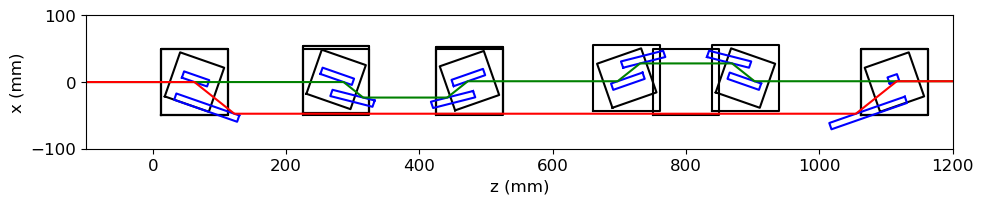

In [31]:
#move_delay0(-500)
#move_delay(2000)
x.t45.delay_umv(6000)
x.t2.x_umv(3925.604162827285)
x.t3.x_umv(2094.395837172715)
pathLenght = x.get_arrival_time()
print((pathLenght['pump a'] - pathLenght['pump b']) / util.c)
print((pathLenght['pump a'] - pathLenght['probe']) / util.c)


fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(10)

x.plot_miniSD_table(ax=ax, xlim=None, ylim=None, show_trajectory=True)

plt.tight_layout()
plt.show()

In [32]:
# Check the spatial separation of the probe and pump
beam_path_sample = x.get_beam_position_on_sample_yag()

In [33]:
beam_path_sample['probe'] - beam_path_sample['cc']

array([-1.01995103e+05,  1.11090213e+01,  1.26976694e+02])